In [1]:
import os
import subprocess
import sys
import numpy as np

In [2]:
top_level_dir = '/'.join( os.getcwd().split( '/' )[ :-2 ] )
if top_level_dir not in sys.path:
    sys.path.append( top_level_dir )

In [3]:
from GenModels.GM.States.GraphicalMessagePassing.Graph import Graph

In [4]:
line = Graph()
line.addEdge( parents=[ 0 ], children=[ 1 ] )
line.addEdge( parents=[ 1 ], children=[ 2 ] )
line.addEdge( parents=[ 2 ], children=[ 3 ] )
line.addEdge( parents=[ 3 ], children=[ 4 ] )
line.addEdge( parents=[ 4 ], children=[ 5 ] )

In [5]:
from GenModels.GM.States.GraphicalMessagePassing.GraphicalMessagePassingBase import GraphMessagePasser, GraphMessagePasserFBS

In [6]:
msg = GraphMessagePasser()
msg.updateParamsFromGraphs( [ line ] )

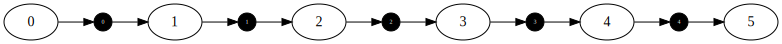

In [7]:
msg.draw( horizontal=True )

In [8]:
# Path to tmp folder where the intermediate images will be rendered
tmp_folder = top_level_dir + '/GenModels/tmp'

In [9]:
u_style = dict( fontcolor='black',
                style='bold',
                color='blue' )
v_style = dict( fontcolor='black',
                style='bold',
                color='green' )
edge_style = dict( fixedsize='true',
                   color='green' )
styles = { 0: u_style, 1: v_style, 2: edge_style }

In [10]:
u_list_global = []
i = 0
def uWork( is_base_case, node_list ):
    global u_list_global
    u_list_global = node_list

def vWork( is_base_case, node_and_edge_list ):
    global u_list_global, i
    
    # Update the style for the u and v list nodes
    node_to_style_key = dict( [ ( n, 0 ) for n in u_list_global ] )
    node_to_style_key.update( dict( [ ( n, 1 ) for n in  node_and_edge_list[ 0 ] ] ) )

    # Update the style for the v list edges
    edge_to_style_key = dict( [ ( ( n, e ), 2 ) for n, e in zip( *node_and_edge_list ) if e is not None ] )

    # Draw the graph
    msg.toGraph().advancedDraw( styles=styles, 
                                 horizontal=True, 
                                 node_to_style_key=node_to_style_key, 
                                 edge_to_style_key=edge_to_style_key, 
                                 output_folder=tmp_folder, 
                                 output_name='graph_%d'%( i ) )
    i += 1

In [11]:
def animate( output_name, msg, uWork, vWork ):
    msg.messagePassing( uWork, vWork )

    # Convert the images to a gif using ImageMagick
    image_paths = [ tmp_folder + '/graph_%d.png'%( j ) for j in range( i ) ]
    commands = [ 'convert', '-loop', '0', '-delay', '50' ] + image_paths + [ output_name ]
    subprocess.call( commands )

    # Delete the contents of tmp
    subprocess.call( [ 'rm' ] + image_paths )

In [12]:
from IPython.display import HTML

In [13]:
output_name = 'line.gif'
animate( output_name, msg, uWork, vWork )
HTML( '<img src="./%s">'%( output_name ) )

In [14]:
tree = Graph()
tree.addEdge( parents=[ 0 ], children=[ 1 ] )
tree.addEdge( parents=[ 1, 2 ], children=[ 3, 4, 5 ] )
tree.addEdge( parents=[ 3 ], children=[ 6 ] )
tree.addEdge( parents=[ 4 ], children=[ 7 ] )
tree.addEdge( parents=[ 7 ], children=[ 8 ] )

In [15]:
msg.updateParamsFromGraphs( [ tree ] )

In [16]:
output_name = 'tree.gif'
animate( output_name, msg, uWork, vWork )
HTML( '<img src="./%s">'%( output_name ) )

In [17]:
tree_with_cycles = Graph()
tree_with_cycles.addEdge( parents=[ 0 ], children=[ 1 ] )
tree_with_cycles.addEdge( parents=[ 1, 2 ], children=[ 3, 4, 5 ] )
tree_with_cycles.addEdge( parents=[ 3, 4 ], children=[ 6 ] )
tree_with_cycles.addEdge( parents=[ 6 ], children=[ 7 ] )
tree_with_cycles.addEdge( parents=[ 5, 6 ], children=[ 8 ] )

feedback_set = np.array( [ 3, 5 ] )

In [18]:
msg = GraphMessagePasserFBS()
msg.updateParamsFromGraphs( [ ( tree_with_cycles, feedback_set ) ] )

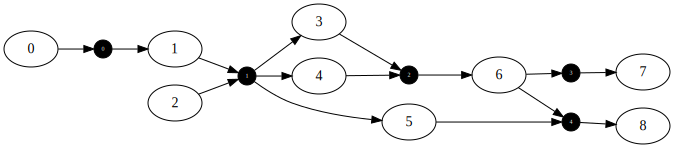

In [19]:
msg.draw( horizontal=True )

In [20]:
u_style = dict( fontcolor='black',
                style='bold',
                color='blue' )
v_style = dict( fontcolor='black',
                style='bold',
                color='green' )
edge_style = dict( fixedsize='true',
                   color='green' )
fbs_node_style = dict( fontcolor='black',
                       style='filled',
                       color='blue' )
styles = { 0: u_style, 1: v_style, 2: edge_style, 3:fbs_node_style }
u_list_global = []
i = 0

def uWorkFBS( is_base_case, node_list ):
    global u_list_global
    u_list_global = node_list
        
def vWorkFBS( is_base_case, node_and_edge_list ):
    global i, u_list_global

    # Update the style for the fbs nodes
    node_to_style_key = dict( [ ( n, 3 ) for n in msg.fbs ] )

    # Update the style for the u list nodes
    node_to_style_key.update( dict( [ ( int( msg.partialGraphIndexToFullGraphIndex( n ) ), 0 ) for n in u_list_global ] ) )

    # Update the style for the v list nodes
    node_to_style_key.update( dict( [ ( int( msg.partialGraphIndexToFullGraphIndex( n ) ), 1 ) for n in  node_and_edge_list[ 0 ] ] ) )

    # Update the style for the v list edges
    edge_to_style_key = dict( [ ( ( int( msg.partialGraphIndexToFullGraphIndex( n ) ), e ), 2 ) for n, e in zip( *node_and_edge_list ) if e is not None ] )

    # Draw the graph
    msg.toGraph().advancedDraw( styles=styles, 
                                horizontal=True, 
                                node_to_style_key=node_to_style_key, 
                                edge_to_style_key=edge_to_style_key, 
                                output_folder=tmp_folder, 
                                output_name='graph_%d'%( i ) )
    u_list_global = []
    i += 1

In [21]:
output_name = 'tree_cycles.gif'
animate( output_name, msg, uWorkFBS, vWorkFBS )
HTML( '<img src="./%s">'%( output_name ) )